In [5]:
!pip install -q openai-whisper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 12.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.1/253.1 MB 6.7 MB/s eta 0:00:000:00:0100:01


In [7]:
!pip install gtts


In [9]:
!pip install jiwer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7


Generating GTTS Audio: 100%|██████████| 103/103 [00:09<00:00, 11.01it/s]


✅ Generated 103 GTTS Audio Files!


/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_location=device)
Processing Au


✅ Final Performance Metrics:
🔹 Average WER: 0.5283
🔹 Average CER: 0.1322
🔹 Average Levenshtein Distance: 0.1445
🔹 Average Processing Time: 0.2125 sec


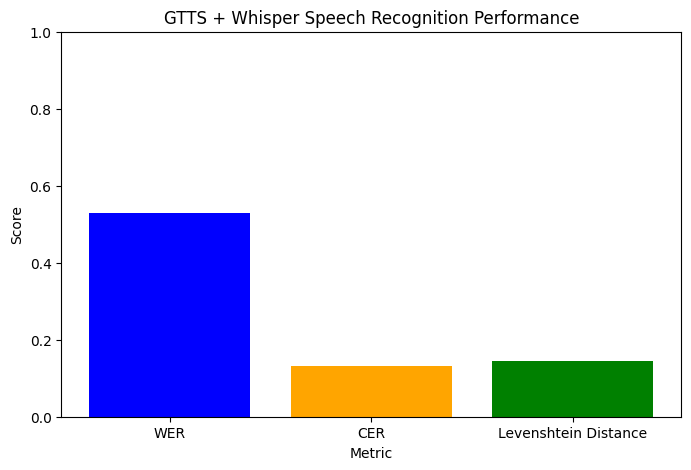

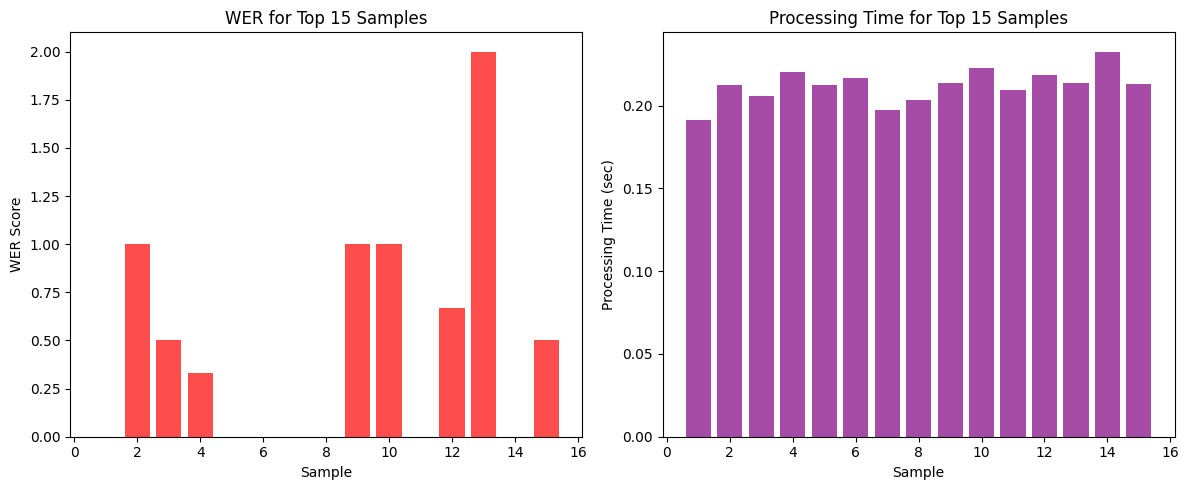

In [11]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import librosa
import whisper
from gtts import gTTS
from jiwer import wer, cer
from scipy.spatial.distance import hamming
from tqdm import tqdm

# 🔹 Set Paths
DATASET_DIR = "./GTTS_Dataset"
AUDIO_DIR = os.path.join(DATASET_DIR, "audio")
TEXT_FILE = os.path.join(DATASET_DIR, "text.txt")

# 🔹 Create Dataset Folders
os.makedirs(AUDIO_DIR, exist_ok=True)

# 🔹 Generate 100 Text Samples
text_samples = [
    "Hello", "Welcome", "Good morning", "How are you", "Artificial Intelligence",
    "Neural Networks", "Machine Learning", "Deep Learning", "Speech Recognition",
    "Self Driving Cars", "Cloud Computing", "Natural Language Processing",
    "OpenAI", "Tesseract OCR", "Quantum Computing", "Computer Vision", 
    "Augmented Reality", "Virtual Reality", "Cryptography", "Blockchain",
    "Cybersecurity", "Programming", "Python", "JavaScript", "Data Science",
    "Big Data", "Statistics", "Mathematics", "Linear Algebra", "Probability",
    "Regression Analysis", "Classification", "Clustering", "Image Processing",
    "Object Detection", "Speech Synthesis", "Whisper Model", "GTTS Testing",
    "Text to Speech", "Audio Processing", "Signal Processing", "Sound Engineering",
    "Voice Recognition", "Language Translation", "Word Embeddings", "Recurrent Networks",
    "Transformers", "Speech Enhancement", "Noisy Speech", "Automatic Speech Recognition",
    "Phonetics", "Speech Patterns", "Speech Disorders", "Voice Synthesis", "AI Ethics",
    "Data Bias", "Explainable AI", "Model Evaluation", "Hyperparameter Tuning",
    "Speech Datasets", "Open Source AI", "Speech APIs", "Real-time Speech Processing",
    "Speech Augmentation", "Voice Assistant", "Human-like Speech", "Chatbots",
    "BERT Model", "GPT Model", "LLMs", "Large Language Models", "Fine-Tuning",
    "Data Preprocessing", "End-to-End Speech Processing", "Attention Mechanisms",
    "Deep Speech", "Tacotron", "WaveNet", "FastSpeech", "Speech Rate",
    "Pitch Control", "Mel Spectrogram", "Audio Features", "Sound Waves",
    "Voice Pitch", "DNN Models", "Acoustic Models", "Vocoder",
    "Language Identification", "Speaker Recognition", "Echo Cancellation",
    "Speech Compression", "Emotion Recognition", "Real-time TTS", "Multilingual TTS",
    "Zero-Shot Learning", "Few-Shot Learning", "Adaptive AI", "Voice Cloning",
    "Speech Latency", "Speaker Adaptation", "Speech Intelligibility", "Voice Modulation"
]

# 🔹 Save Text Samples
with open(TEXT_FILE, "w") as f:
    for line in text_samples:
        f.write(line + "\n")

# 🔹 Generate GTTS Audio Files
for idx, text in enumerate(tqdm(text_samples, desc="Generating GTTS Audio")):
    tts = gTTS(text=text, lang="en")
    tts.save(os.path.join(AUDIO_DIR, f"{idx+1}.mp3"))

print(f"✅ Generated {len(text_samples)} GTTS Audio Files!")

# 🔹 Load Whisper Model (Choose: 'tiny', 'base', or 'large')
model = whisper.load_model("base")

# 🔹 Perform Speech Recognition
ground_truths, predictions, processing_times = [], [], []
wer_scores, cer_scores, lev_distances = [], [], []

for idx, text in enumerate(tqdm(text_samples[:100], desc="Processing Audio")):
    audio_path = os.path.join(AUDIO_DIR, f"{idx+1}.mp3")
    
    # Load Audio
    start_time = time.time()
    audio, sr = librosa.load(audio_path, sr=16000)

    # Transcribe using Whisper
    result = model.transcribe(audio_path)
    ocr_text = result["text"].strip()

    # Calculate Processing Time
    elapsed_time = time.time() - start_time
    processing_times.append(elapsed_time)

    # Store Results
    ground_truths.append(text)
    predictions.append(ocr_text)

    # Compute Metrics
    wer_scores.append(wer(text, ocr_text))
    cer_scores.append(cer(text, ocr_text))
    
    # 🔹 Fix: Hamming Distance Calculation
    max_len = max(len(text), len(ocr_text))
    padded_text = text.ljust(max_len)
    padded_ocr_text = ocr_text.ljust(max_len)
    lev_distances.append(hamming(list(padded_text), list(padded_ocr_text)))

# 🔹 Compute Final Metrics
avg_wer = np.mean(wer_scores)
avg_cer = np.mean(cer_scores)
avg_lev_dist = np.mean(lev_distances)
avg_processing_time = np.mean(processing_times)

# 🔹 Print Summary
print(f"\n✅ Final Performance Metrics:")
print(f"🔹 Average WER: {avg_wer:.4f}")
print(f"🔹 Average CER: {avg_cer:.4f}")
print(f"🔹 Average Levenshtein Distance: {avg_lev_dist:.4f}")
print(f"🔹 Average Processing Time: {avg_processing_time:.4f} sec")

# 🔹 Generate Performance Graphs
metrics = ["WER", "CER", "Levenshtein Distance"]
scores = [avg_wer, avg_cer, avg_lev_dist]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=["blue", "orange", "green"])
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("GTTS + Whisper Speech Recognition Performance")
plt.ylim(0, 1)
plt.show()

# 🔹 Plot Errors & Processing Time for Top 15 Samples
plt.figure(figsize=(12, 5))

# WER Error Plot
plt.subplot(1, 2, 1)
plt.bar(range(1, 16), wer_scores[:15], color="red", alpha=0.7)
plt.xlabel("Sample")
plt.ylabel("WER Score")
plt.title("WER for Top 15 Samples")

# Processing Time Plot
plt.subplot(1, 2, 2)
plt.bar(range(1, 16), processing_times[:15], color="purple", alpha=0.7)
plt.xlabel("Sample")
plt.ylabel("Processing Time (sec)")
plt.title("Processing Time for Top 15 Samples")

plt.tight_layout()
plt.show()
